In [3]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style("whitegrid")
from collections import defaultdict
from numpy import mean
from numpy import std
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats
import itertools
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


In [4]:
def run_training(X_train,y_train,model):
    
    #length of training set   
    data_length= len(X_train)
    
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=33, shuffle=True)
    
    #create the model
    if model == 'Extra Trees':
        clf = ExtraTreesClassifier(n_estimators=1000, random_state=33)
    elif model == 'Random Forest':
        clf = RandomForestClassifier(n_estimators=1000, random_state=33)
    elif model == 'Logistic Regression':
        clf = LogisticRegression(max_iter=10000, solver = 'lbfgs',random_state=33)
        std = StandardScaler()
        std.fit(X_train.values)

        #apply

        X = std.transform(X_train.values)
    elif model == 'Bayes':
        clf = GaussianNB()
    elif model == 'XGBoost':
        clf = XGBClassifier(use_label_encoder=False, verbosity=0)
        
  
    
    #fit the model on training data 
    clf.fit(X_train, y_train)
    
    scoring = ['accuracy','precision', 'recall', 'f1']
  
    # evaluate model
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)

  
    

    
    print("The Accuracy Scores for each fold are: "+str(scores['test_accuracy']),
          "\nThe Precision Sores for each fold are: "+str(scores['test_precision']),
          "\nThe Recall Sores for each fold are: "+str(scores['test_recall']),
          "\nThe F1 Sores for each fold are: "+str(scores['test_f1'])
          
         )
    #create df of results 
    df = pd.DataFrame(scores)
    df['model'] = model
    
    #reorder columns
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    
    return df

In [5]:
#load data

data = pd.read_csv("train_full_corr_all.csv")

#drop recording labels for modeling 
cols = ['Recording']
df = data.drop(cols, axis=1)

#create dummy variable for y 

df = pd.get_dummies(df, drop_first=True)

#create X and y 

X_train = df.drop('y_preictal', axis = 1)
y_train = df['y_preictal']




In [6]:
data["y"].value_counts()

interictal    3008
preictal       245
Name: y, dtype: int64

In [7]:
#train extra trees

train_1 = run_training(X_train,y_train,'Extra Trees')

The Accuracy Scores for each fold are: [0.94930876 0.94623656 0.94162826 0.94769231 0.94769231] 
The Precision Sores for each fold are: [0.9        0.95454545 1.         0.93333333 0.91666667] 
The Recall Sores for each fold are: [0.36734694 0.38181818 0.24       0.29787234 0.25      ] 
The F1 Sores for each fold are: [0.52173913 0.54545455 0.38709677 0.4516129  0.39285714]


In [8]:
train_1

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,Extra Trees,10.595685,0.296654,0.949309,0.900000,0.367347,0.521739
1,Extra Trees,10.849593,0.199450,0.946237,0.954545,0.381818,0.545455
2,Extra Trees,10.488298,0.282116,0.941628,1.000000,0.240000,0.387097
3,Extra Trees,10.906247,0.185762,0.947692,0.933333,0.297872,0.451613
4,Extra Trees,10.509825,0.291950,0.947692,0.916667,0.250000,0.392857


In [9]:
#train random forest 
train_2 = run_training(X_train,y_train, 'Random Forest')

The Accuracy Scores for each fold are: [0.95084485 0.93855607 0.94162826 0.94615385 0.94307692] 
The Precision Sores for each fold are: [0.84       0.94117647 1.         0.8        0.81818182] 
The Recall Sores for each fold are: [0.42857143 0.29090909 0.24       0.34042553 0.20454545] 
The F1 Sores for each fold are: [0.56756757 0.44444444 0.38709677 0.47761194 0.32727273]


In [10]:
train_2

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,Random Forest,66.329125,0.152251,0.950845,0.840000,0.428571,0.567568
1,Random Forest,71.599992,0.136722,0.938556,0.941176,0.290909,0.444444
2,Random Forest,68.770613,0.151115,0.941628,1.000000,0.240000,0.387097
3,Random Forest,70.047694,0.149906,0.946154,0.800000,0.340426,0.477612
4,Random Forest,70.112688,0.142065,0.943077,0.818182,0.204545,0.327273


In [11]:
#train logistic regression
train_3 = run_training(X_train, y_train, 'Logistic Regression')

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Accuracy Scores for each fold are: [0.90015361 0.90168971 0.906298   0.91538462 0.90769231] 
The Precision Sores for each fold are: [0.35185185 0.42105263 0.37777778 0.40909091 0.34      ] 
The Recall Sores for each fold are: [0.3877551  0.43636364 0.34       0.38297872 0.38636364] 
The F1 Sores for each fold are: [0.36893204 0.42857143 0.35789474 0.3956044  0.36170213]


In [12]:
train_3 

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,Logistic Regression,123.518723,0.009586,0.900154,0.351852,0.387755,0.368932
1,Logistic Regression,123.902285,0.026036,0.901690,0.421053,0.436364,0.428571
2,Logistic Regression,124.412494,0.013691,0.906298,0.377778,0.340000,0.357895
3,Logistic Regression,123.098763,0.012322,0.915385,0.409091,0.382979,0.395604
4,Logistic Regression,124.252547,0.019901,0.907692,0.340000,0.386364,0.361702


In [13]:
#train bayes
train_4= run_training(X_train, y_train, 'Bayes')

The Accuracy Scores for each fold are: [0.92165899 0.9078341  0.91858679 0.91846154 0.92923077] 
The Precision Sores for each fold are: [0.25       0.14285714 0.28571429 0.2        0.375     ] 
The Recall Sores for each fold are: [0.02040816 0.01818182 0.04       0.04255319 0.06818182] 
The F1 Sores for each fold are: [0.03773585 0.03225806 0.07017544 0.07017544 0.11538462]


In [14]:
train_4

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,Bayes,0.113021,0.028563,0.921659,0.250000,0.020408,0.037736
1,Bayes,0.113398,0.028197,0.907834,0.142857,0.018182,0.032258
2,Bayes,0.103591,0.029577,0.918587,0.285714,0.040000,0.070175
3,Bayes,0.118370,0.027227,0.918462,0.200000,0.042553,0.070175
4,Bayes,0.121624,0.024394,0.929231,0.375000,0.068182,0.115385


In [15]:
#train xgboost
train_5 = run_training(X_train, y_train ,'XGBoost')

The Accuracy Scores for each fold are: [0.94777266 0.93855607 0.94470046 0.95076923 0.94      ] 
The Precision Sores for each fold are: [0.94117647 0.82608696 0.9375     0.85714286 0.77777778] 
The Recall Sores for each fold are: [0.32653061 0.34545455 0.3        0.38297872 0.15909091] 
The F1 Sores for each fold are: [0.48484848 0.48717949 0.45454545 0.52941176 0.26415094]


In [16]:
train_5

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,XGBoost,19.889946,0.017457,0.947773,0.941176,0.326531,0.484848
1,XGBoost,19.763758,0.017983,0.938556,0.826087,0.345455,0.487179
2,XGBoost,16.629993,0.009105,0.944700,0.937500,0.300000,0.454545
3,XGBoost,19.889658,0.017651,0.950769,0.857143,0.382979,0.529412
4,XGBoost,19.618232,0.058201,0.940000,0.777778,0.159091,0.264151


In [17]:
#create results df
frames = [train_1, train_2,train_3,train_4,train_5]
train_results = pd.concat(frames)


In [18]:
#create average results df 
train_average=train_results.groupby('model')[['test_accuracy','test_precision','test_recall', 'test_f1']].mean().reset_index()

In [19]:
train_average

,model,test_accuracy,test_precision,test_recall,test_f1
0,Bayes,0.919154,0.250714,0.037865,0.065146
1,Extra Trees,0.946512,0.940909,0.307407,0.459752
2,Logistic Regression,0.906244,0.379955,0.386692,0.382541
3,Random Forest,0.944052,0.879872,0.300890,0.440799
4,XGBoost,0.944360,0.867937,0.302811,0.444027


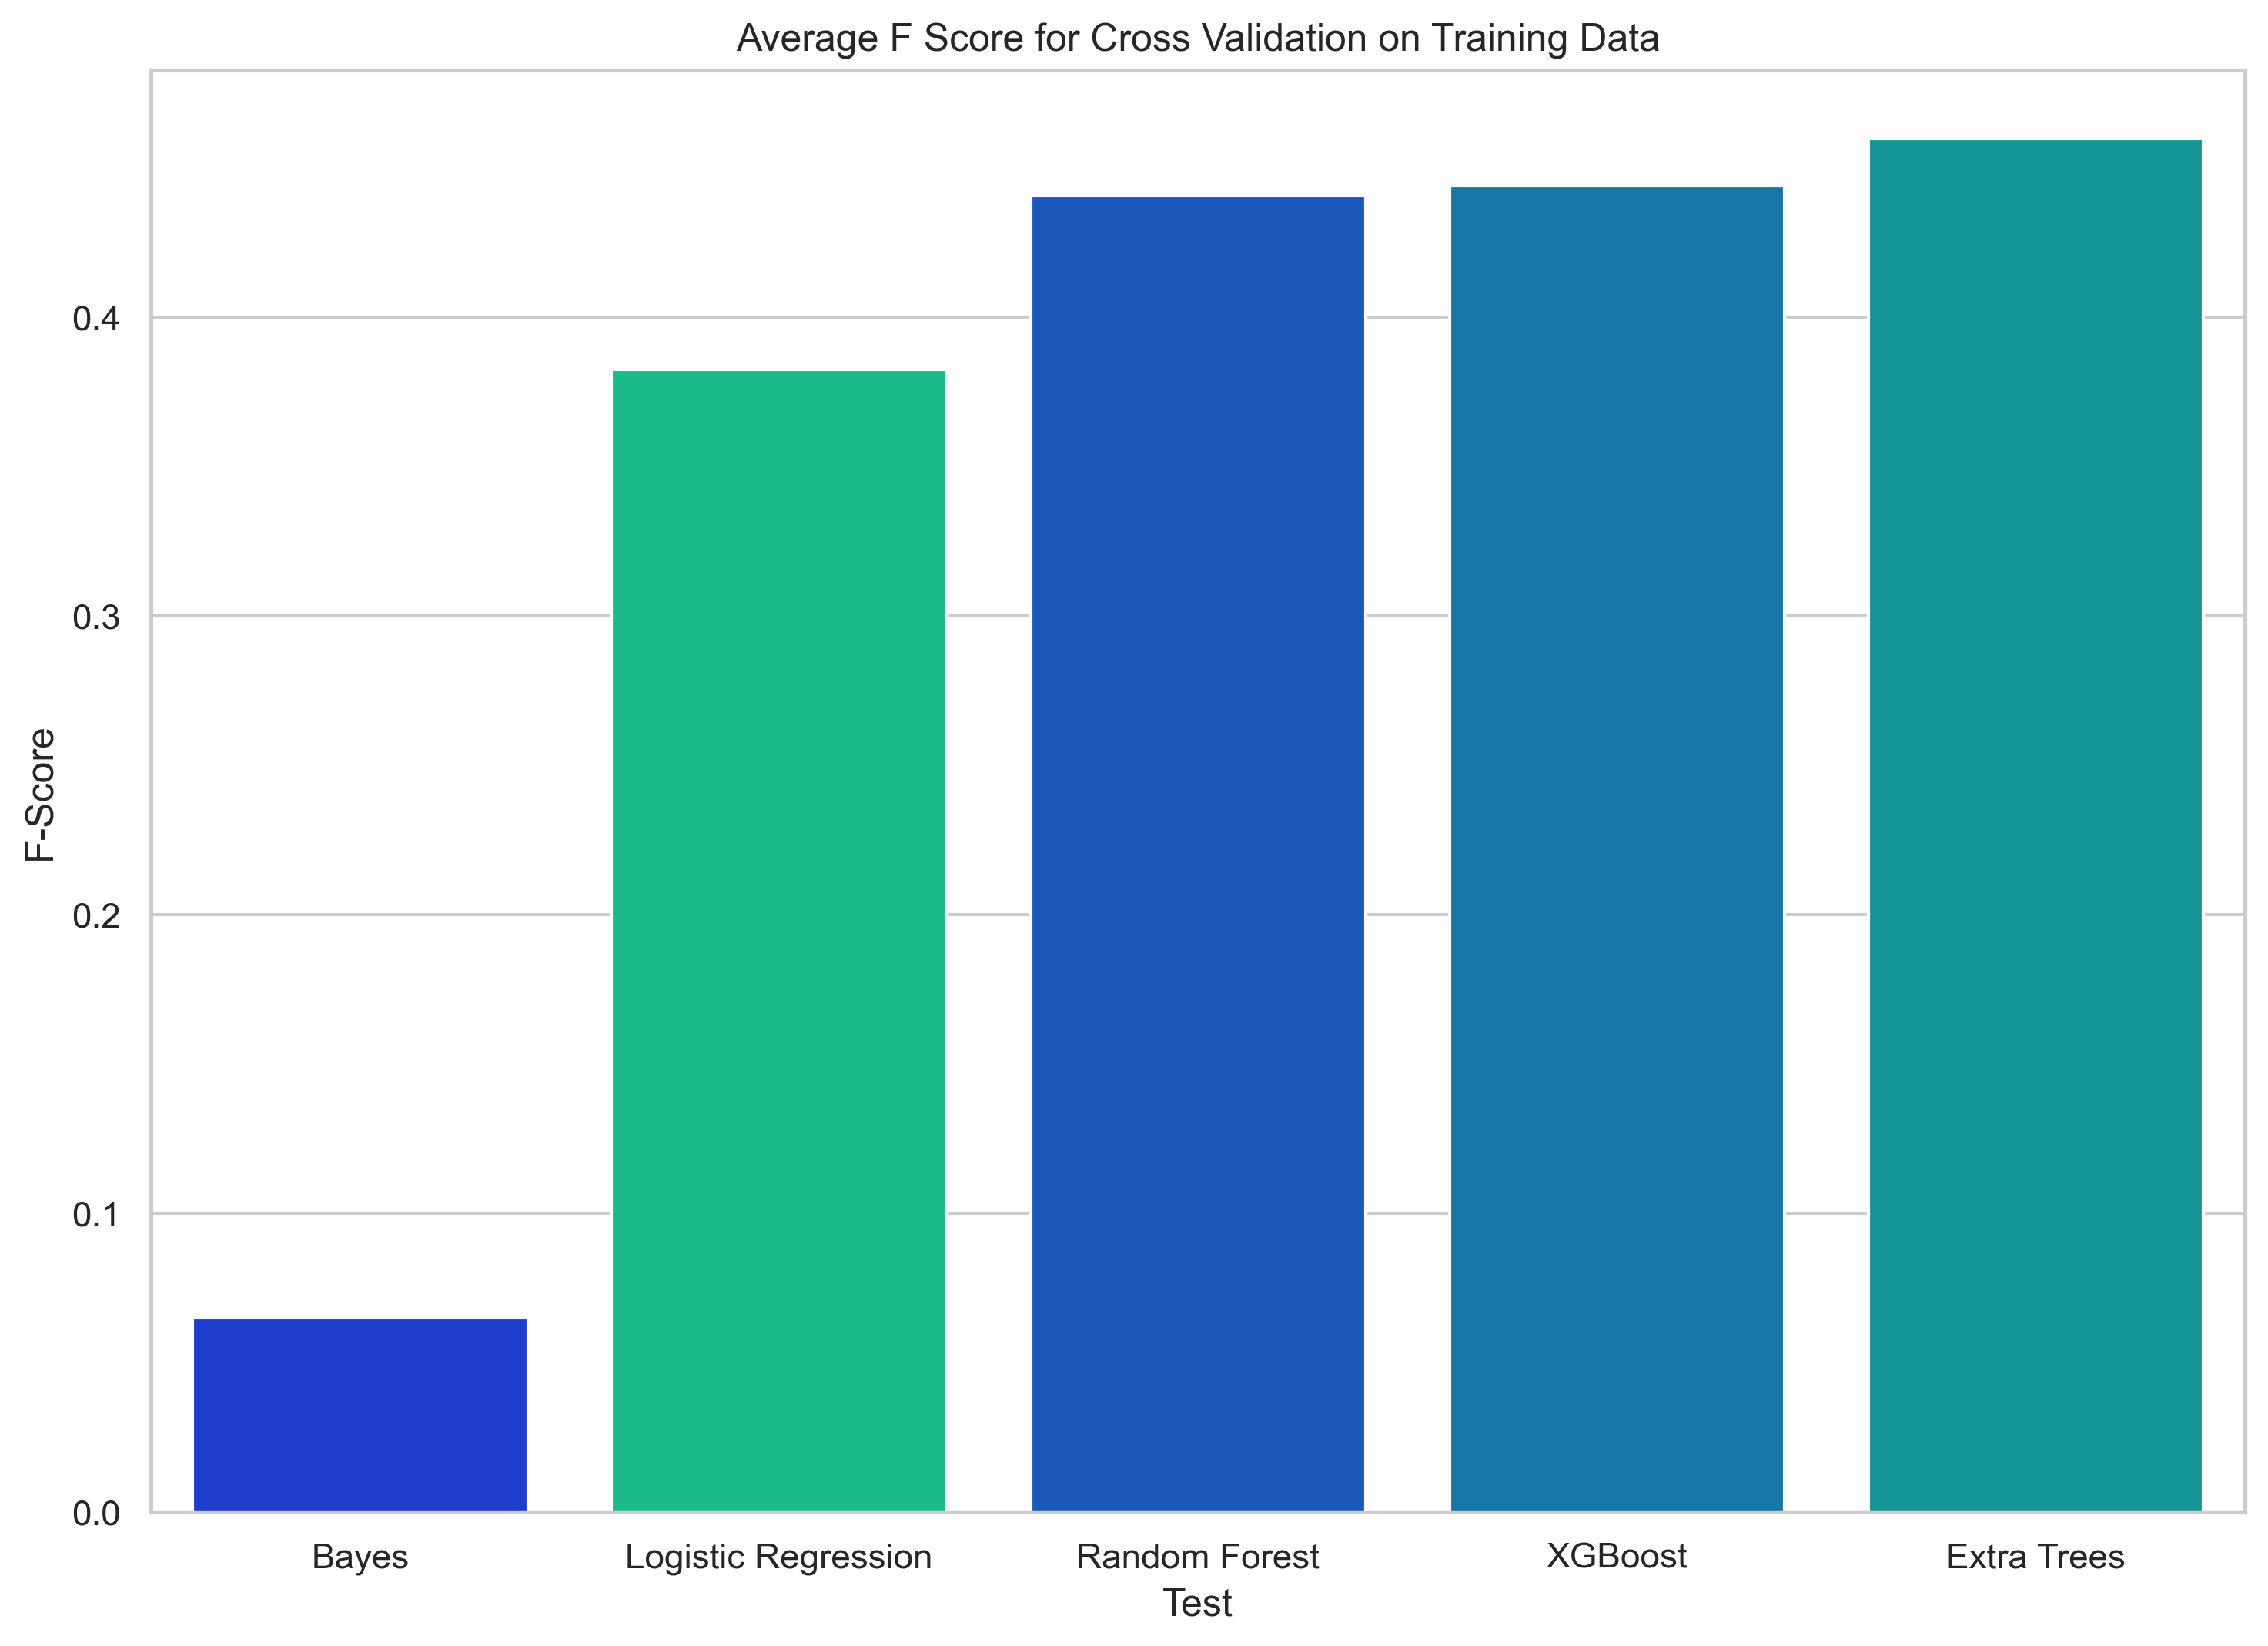

In [20]:
#plot the F1 Score Average

#color scheme
pal = sns.color_palette("winter_r", (len(train_average)))
rank = train_average["test_f1"].argsort().argsort() 

#sort the df by f1
train_average = train_average.sort_values('test_f1')

#plot the data
sns.barplot(x=train_average.model, y= train_average.test_f1, palette=np.array(pal[::-1])[rank])

#titles
plt.xlabel("Test")
plt.ylabel("F-Score")
plt.title("Average F Score for Cross Validation on Training Data")


#save the plot 
plt.savefig('F_score_cv_full_corr_all.png')


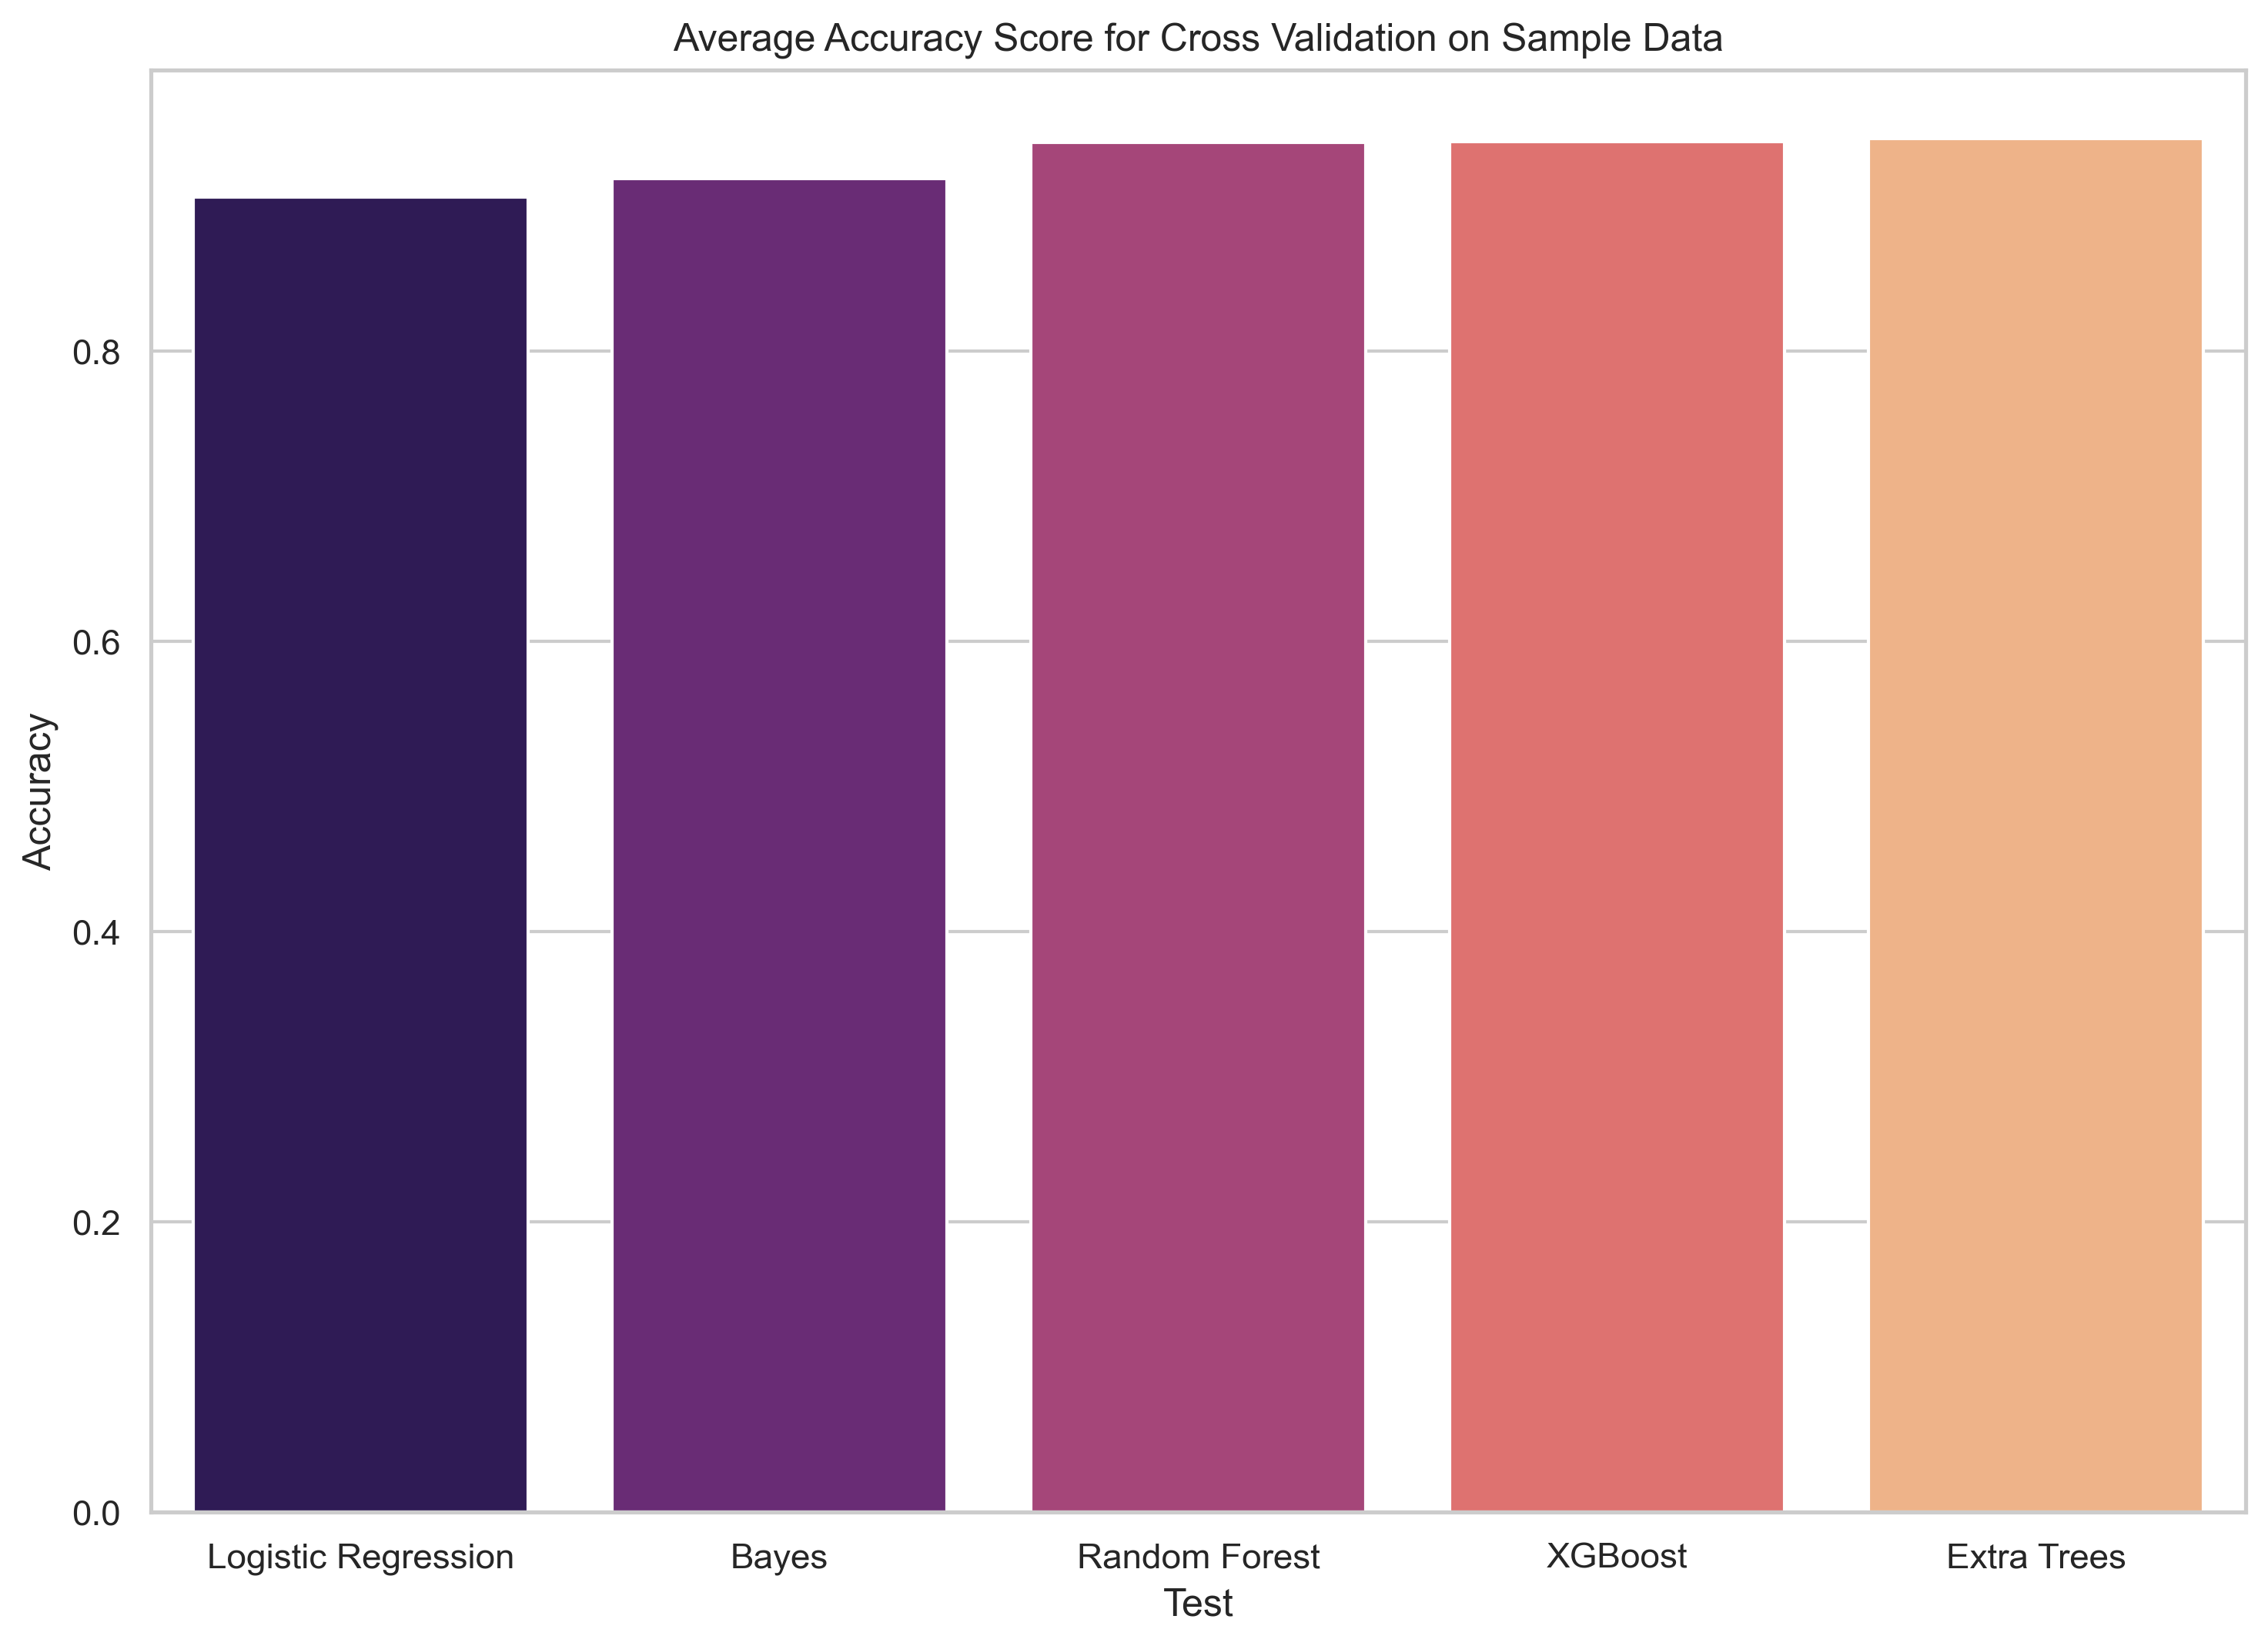

In [21]:
#plot the Accuracy Average

#color scheme
pal = sns.color_palette("magma_r", (len(train_average)))
rank = train_average["test_f1"].argsort().argsort() 

#sort the df by f1
train_average = train_average.sort_values('test_accuracy')

#plot the data
sns.barplot(x=train_average.model, y= train_average.test_accuracy, palette=np.array(pal[::-1])[rank])

#titles
plt.xlabel("Test")
plt.ylabel("Accuracy")
plt.title("Average Accuracy Score for Cross Validation on Sample Data")


#save the plot 
plt.savefig('Accuracy_score_cv_full_corr_all.png')


In [22]:
#save results
train_results.to_csv('cross_val_results_full_corr_all.csv', index=False)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re